In [45]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats
%load_ext autoreload
%autoreload 2

np.random.seed(25)
torch.manual_seed(25)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
DEVICE = 'cuda:0'
MAX_EPOCHS = 100
EXPECTED_N = [5000,5000,5000,20000]
#EXPECTED_N = [20000]*4

## Torus model

In [47]:
def simulator(z, center = np.array([0.6, 0.8])):
    r = sum((z[:2]-center)**2)**0.5  # Return radial distance from center
    x = np.array([z[0], r, z[2]])
    return x

def noise(x, z = None, noise = np.array([0.03, 0.005, 0.2])):
    n = np.random.randn(*x.shape)*noise
    return x + n

z0 = np.array([0.57, 0.8, 1.0])
zdim = len(z0)
x0 = simulator(z0)  # Using Asimov data

In [48]:
cache = swyft.MemoryCache(zdim = zdim, xshape = x0.shape)

Creating new cache.


## Inference

In [49]:
intensity = None
pre = None
rn=False

for i in range(4):
    if intensity is None:
        intensity = swyft.get_unit_intensity(expected_n=EXPECTED_N[i], dim=zdim)
    else:
        intensity = swyft.get_constrained_intensity(
            expected_n=EXPECTED_N[i],
            ratio_estimator=re,
            x0=x0,
            threshold=1e-3,
        )
    cache.grow(intensity)
    cache.simulate(simulator)
    points = swyft.Points(cache, intensity, noise)
    re = swyft.RatioEstimator(points, device=DEVICE, previous_ratio_estimator=pre,recycle_net=rn)
    re.train(max_epochs=MAX_EPOCHS, batch_size=128, lr_schedule=[1e-3, 3e-4, 1e-4])
    pre=re
    rn=True

Simulate:   4%|▍         | 222/5092 [00:00<00:02, 2215.01it/s]

Adding 5092 new samples. Run simulator!


Simulate: 100%|██████████| 5092/5092 [00:01<00:00, 2902.55it/s]


yshape (shape of features between head and legs): 3
Start training
No new simulator runs required.
LR iteration 0
Validation loss: 22.507946968078613
Validation loss: 17.278128623962402
Validation loss: 15.221457481384277
Validation loss: 14.270957946777344
Validation loss: 13.995370864868164
Validation loss: 13.918426036834717
Validation loss: 13.185552597045898
Validation loss: 13.248754024505615
Total epochs: 8
LR iteration 1
Validation loss: 13.33461046218872
Validation loss: 12.873475551605225
Validation loss: 12.964639663696289
Total epochs: 3
LR iteration 2
Validation loss: 13.106790542602539
Validation loss: 13.175620079040527
Total epochs: 2


Simulate:   7%|▋         | 328/4696 [00:00<00:01, 3273.92it/s]

Constrained posterior area: 0.06596090843500572
Adding 4696 new samples. Run simulator!


Simulate: 100%|██████████| 4696/4696 [00:01<00:00, 3266.39it/s]


Start training
No new simulator runs required.
LR iteration 0
Validation loss: 20.429757118225098
Validation loss: 19.83354139328003
Validation loss: 19.716229915618896
Validation loss: 18.86435031890869
Validation loss: 18.686362266540527
Validation loss: 18.475088119506836
Validation loss: 18.404773235321045
Validation loss: 18.07466411590576
Validation loss: 17.745656490325928
Validation loss: 17.25790500640869
Validation loss: 17.6260986328125
Total epochs: 11
LR iteration 1
Validation loss: 17.65032434463501
Validation loss: 17.791751384735107
Total epochs: 2
LR iteration 2
Validation loss: 17.67862319946289
Validation loss: 17.783597946166992
Total epochs: 2


Simulate:  18%|█▊        | 322/1742 [00:00<00:00, 3210.05it/s]

Constrained posterior area: 0.04304852769546161
Adding 1742 new samples. Run simulator!


Simulate: 100%|██████████| 1742/1742 [00:00<00:00, 3098.39it/s]


Start training
No new simulator runs required.
LR iteration 0
Validation loss: 19.52899408340454
Validation loss: 18.89045524597168
Validation loss: 18.75416326522827
Validation loss: 18.93138885498047
Total epochs: 4
LR iteration 1
Validation loss: 19.3176007270813
Validation loss: 18.627843856811523
Validation loss: 18.722525119781494
Total epochs: 3
LR iteration 2
Validation loss: 18.684969902038574
Validation loss: 18.3787841796875
Validation loss: 18.43929147720337
Total epochs: 3


Simulate:   2%|▏         | 329/15629 [00:00<00:04, 3288.73it/s]

Constrained posterior area: 0.03763513249878713
Adding 15629 new samples. Run simulator!


Simulate: 100%|██████████| 15629/15629 [00:04<00:00, 3320.68it/s]


Start training
No new simulator runs required.
LR iteration 0
Validation loss: 96.32600736618042
Validation loss: 95.5732192993164
Validation loss: 94.43105125427246
Validation loss: 94.40638542175293
Validation loss: 92.32895946502686
Validation loss: 93.2119083404541
Total epochs: 6
LR iteration 1
Validation loss: 91.10702705383301
Validation loss: 90.36349534988403
Validation loss: 91.10018968582153
Total epochs: 3
LR iteration 2
Validation loss: 91.51316356658936
Validation loss: 90.92920112609863
Validation loss: 90.31492376327515
Validation loss: 91.10168981552124
Total epochs: 4


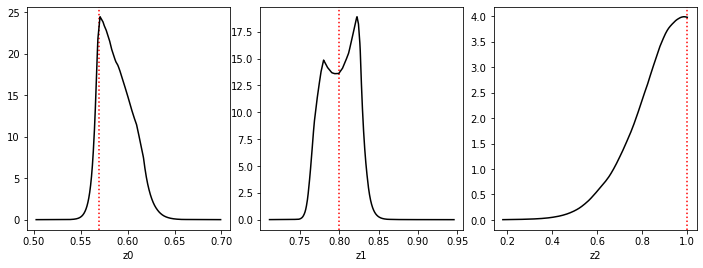

In [50]:
swyft.plot1d(re, x0 = x0, z0 = z0, cmap = 'Greys', dims = (12, 4),max_n_points=10000);

In [51]:
re2 = swyft.RatioEstimator(points, combinations = [[0, 1], [0, 2], [1, 2]], device=DEVICE)

yshape (shape of features between head and legs): 3


In [52]:
re2.train(max_epochs=MAX_EPOCHS, batch_size=32, lr_schedule=[1e-3, 3e-4, 1e-4])

Start training
LR iteration 0
Validation loss: 360.7224884033203
Validation loss: 336.8915481567383
Validation loss: 308.39710664749146
Validation loss: 291.7849338054657
Validation loss: 281.31494331359863
Validation loss: 298.8257620334625
Total epochs: 6
LR iteration 1
Validation loss: 270.67835903167725
Validation loss: 263.8421878814697
Validation loss: 265.2513110637665
Total epochs: 3
LR iteration 2
Validation loss: 253.5311872959137
Validation loss: 251.85225176811218
Validation loss: 251.07270765304565
Validation loss: 248.56932997703552
Validation loss: 251.4634609222412
Total epochs: 5


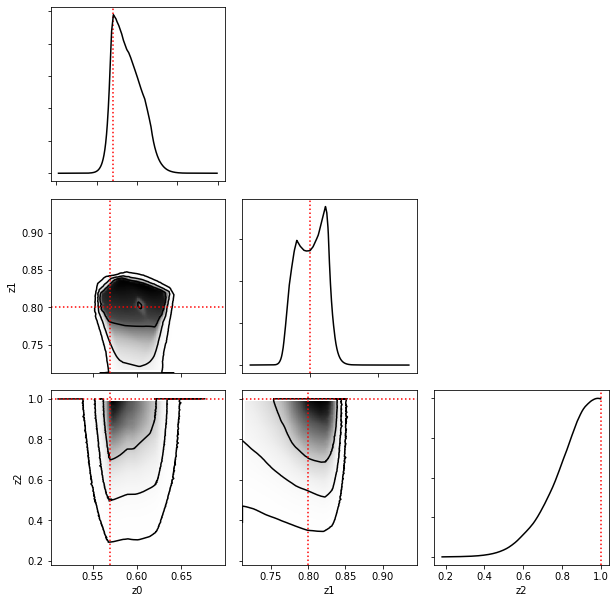

In [53]:
swyft.corner(re, re2, x0 = x0, z0 = z0, cmap = 'Greys', dim = 10,max_n_points=20000)